## 1. Data Loading and Preprocessing

In [1]:
# import necessary libraries and functions
%matplotlib inline

import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt

from keras.layers import Dense
from keras.models import Sequential
from keras.preprocessing import image

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
# create random number generator
seed = 42
rng = np.random.RandomState(seed)

In [3]:
# load csv file
data = pd.read_csv('../datasets/emergency_classification/emergency_classification.csv')

In [4]:
# load images and store it in numpy array
X = []
for img_name in data.image_names:
    img = plt.imread('../datasets/emergency_classification/images/' + img_name)
    X.append(img)
    
X=np.array(X)

# create target
y = data.emergency_or_not.values

In [5]:
# reshape to one single row
X = X.reshape(2352, 224*224*3)

In [6]:
# preprocessing
X = X / X.max()

In [7]:
# set aside validation data
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

## 2. Model Building

In [8]:
model=Sequential()

model.add(Dense(100, input_dim=224*224*3, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 15,053,001
Trainable params: 15,053,001
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.fit(X_train, y_train, epochs=10, batch_size=128,validation_data=(X_valid,y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/10
1646/1646 [==============================] - 4s 2ms/step - loss: 0.8106 - acc: 0.5741 - val_loss: 0.6659 - val_acc: 0.5623
Epoch 2/10
1646/1646 [==============================] - 3s 2ms/step - loss: 0.6489 - acc: 0.6318 - val_loss: 0.6316 - val_acc: 0.6388
Epoch 3/10
1646/1646 [==============================] - 3s 2ms/step - loss: 0.6411 - acc: 0.6324 - val_loss: 0.6171 - val_acc: 0.6643
Epoch 4/10
1646/1646 [==============================] - 2s 1ms/step - loss: 0.6173 - acc: 0.6634 - val_loss: 0.6794 - val_acc: 0.5708
Epoch 5/10
1646/1646 [==============================] - 3s 2ms/step - loss: 0.6179 - acc: 0.6610 - val_loss: 0.6150 - val_acc: 0.6686
Epoch 6/10
1646/1646 [==============================] - 3s 2ms/step - loss: 0.5843 - acc: 0.7041 - val_loss: 0.6881 - val_acc: 0.5779
Epoch 7/10
1646/1646 [==============================] - 3s 2ms/step - loss: 0.5958 - acc: 0.6914 - val_loss: 0.5776 - val_acc: 0.6969
Epoch 8/10
1646

19 % sure that it is emergency
Whereas actual class is  0


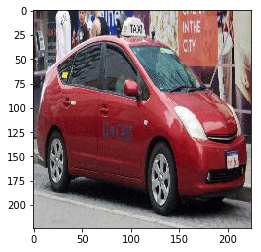

In [11]:
# get predictions
predictions = model.predict_classes(X_valid)[:, 0]
prediction_probabilities = model.predict(X_valid)[:, 0]

# pull out the original images from the data
# which correspond to the validation data
_, valid_vehicles, _, valid_y = train_test_split(data.image_names.values, y, test_size=0.3, random_state=seed)

# get a random index to plot image randomly
index = rng.choice(range(len(valid_vehicles)))

# get the corresponding image name and probability
img_name = valid_vehicles[index]
prob = (prediction_probabilities * 100).astype(int)[index]

# read the image
img = plt.imread('../datasets/emergency_classification/images/' + img_name)

# print probability and actual class
print(prob , '% sure that it is emergency')
print('Whereas actual class is ', valid_y[index])

# plot image
plt.imshow(img)

In [12]:
incorrect_indices = np.where(predictions != y_valid)[0]

In [13]:
len(incorrect_indices), predictions.shape

(302, (706,))

14 % sure that it is emergency
Whereas actual class is  1


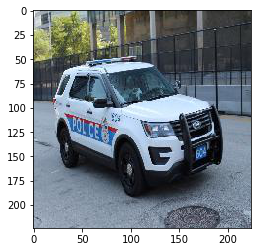

In [14]:
index = rng.choice(incorrect_indices)
img_name = valid_vehicles[index]


prob = (prediction_probabilities * 100).astype(int)[index]

img = plt.imread('../datasets/emergency_classification/images/' + img_name)

print(prob , '% sure that it is emergency')
print('Whereas actual class is ', y_valid[index])

plt.imshow(img)

## 3. Hyperparameter Tuning

Weights of neural network ----> Parameter

Activation Function ----> HyperParameter

In [15]:
# change activation function of hidden layer
# increase hidden neurons
# increase hidden layers
# increase number of epochs
# change optimizer

In [16]:
# change activation function of hidden layer
model=Sequential()

model.add(Dense(100, input_dim=224*224*3, activation='tanh'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [17]:
model.fit(X_train, y_train, epochs=10, batch_size=128,validation_data=(X_valid,y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/10
1646/1646 [==============================] - 2s 1ms/step - loss: 1.5686 - acc: 0.5765 - val_loss: 0.6776 - val_acc: 0.5609
Epoch 2/10
1646/1646 [==============================] - 2s 1ms/step - loss: 0.6653 - acc: 0.5966 - val_loss: 0.6570 - val_acc: 0.5935
Epoch 3/10
1646/1646 [==============================] - 2s 1ms/step - loss: 0.6642 - acc: 0.6118 - val_loss: 0.6410 - val_acc: 0.6700
Epoch 4/10
1646/1646 [==============================] - 2s 1ms/step - loss: 0.6398 - acc: 0.6549 - val_loss: 0.6347 - val_acc: 0.6473
Epoch 5/10
1646/1646 [==============================] - 2s 1ms/step - loss: 0.6279 - acc: 0.6659 - val_loss: 0.6291 - val_acc: 0.6544
Epoch 6/10
1646/1646 [==============================] - 2s 1ms/step - loss: 0.6283 - acc: 0.6501 - val_loss: 0.6752 - val_acc: 0.6048
Epoch 7/10
1646/1646 [==============================] - 2s 1ms/step - loss: 0.6216 - acc: 0.6731 - val_loss: 0.7056 - val_acc: 0.5765
Epoch 8/10
1646

In [18]:
# increase hidden neurons
model=Sequential()

model.add(Dense(1024, input_dim=224*224*3, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [19]:
model.fit(X_train, y_train, epochs=10, batch_size=128,validation_data=(X_valid,y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/10
1646/1646 [==============================] - 5s 3ms/step - loss: 1.4616 - acc: 0.5243 - val_loss: 0.7325 - val_acc: 0.5609
Epoch 2/10
1646/1646 [==============================] - 3s 2ms/step - loss: 0.7250 - acc: 0.5814 - val_loss: 0.6710 - val_acc: 0.5807
Epoch 3/10
1646/1646 [==============================] - 3s 2ms/step - loss: 0.6854 - acc: 0.5832 - val_loss: 0.6368 - val_acc: 0.6105
Epoch 4/10
1646/1646 [==============================] - 3s 2ms/step - loss: 0.6145 - acc: 0.6604 - val_loss: 0.6114 - val_acc: 0.6785
Epoch 5/10
1646/1646 [==============================] - 3s 2ms/step - loss: 0.6086 - acc: 0.6768 - val_loss: 0.6645 - val_acc: 0.5935
Epoch 6/10
1646/1646 [==============================] - 3s 2ms/step - loss: 0.6518 - acc: 0.6337 - val_loss: 0.6375 - val_acc: 0.6133
Epoch 7/10
1646/1646 [==============================] - 3s 2ms/step - loss: 0.6600 - acc: 0.6075 - val_loss: 0.6004 - val_acc: 0.6714
Epoch 8/10
1646

In [20]:
# increase number of epochs
model=Sequential()

model.add(Dense(1024, input_dim=224*224*3, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [21]:
model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/50
1646/1646 [==============================] - 5s 3ms/step - loss: 1.5597 - acc: 0.5286 - val_loss: 0.7426 - val_acc: 0.4646
Epoch 2/50
1646/1646 [==============================] - 4s 2ms/step - loss: 0.6866 - acc: 0.5790 - val_loss: 0.7095 - val_acc: 0.5637
Epoch 3/50
1646/1646 [==============================] - 4s 2ms/step - loss: 0.6579 - acc: 0.6069 - val_loss: 0.7739 - val_acc: 0.5623
Epoch 4/50
1646/1646 [==============================] - 4s 2ms/step - loss: 0.6418 - acc: 0.6452 - val_loss: 0.6238 - val_acc: 0.6530
Epoch 5/50
1646/1646 [==============================] - 4s 2ms/step - loss: 0.6339 - acc: 0.6537 - val_loss: 0.5961 - val_acc: 0.6898
Epoch 6/50
1646/1646 [==============================] - 4s 2ms/step - loss: 0.5996 - acc: 0.6774 - val_loss: 0.6074 - val_acc: 0.6700
Epoch 7/50
1646/1646 [==============================] - 4s 2ms/step - loss: 0.6122 - acc: 0.6683 - val_loss: 0.6373 - val_acc: 0.6303
Epoch 8/50
1646

In [22]:
# increase hidden layers
model=Sequential()

model.add(Dense(1024, input_dim=224*224*3, activation='sigmoid'))
model.add(Dense(1024, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [23]:
model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/50
1646/1646 [==============================] - 5s 3ms/step - loss: 0.6774 - acc: 0.5972 - val_loss: 0.6677 - val_acc: 0.6190
Epoch 2/50
1646/1646 [==============================] - 4s 2ms/step - loss: 0.6618 - acc: 0.5905 - val_loss: 0.6619 - val_acc: 0.6431
Epoch 3/50
1646/1646 [==============================] - 4s 2ms/step - loss: 0.6559 - acc: 0.6166 - val_loss: 0.6515 - val_acc: 0.6006
Epoch 4/50
1646/1646 [==============================] - 4s 2ms/step - loss: 0.6453 - acc: 0.6294 - val_loss: 0.6457 - val_acc: 0.6190
Epoch 5/50
1646/1646 [==============================] - 4s 2ms/step - loss: 0.6403 - acc: 0.6495 - val_loss: 0.6338 - val_acc: 0.6586
Epoch 6/50
1646/1646 [==============================] - 4s 2ms/step - loss: 0.6336 - acc: 0.6555 - val_loss: 0.6287 - val_acc: 0.6771
Epoch 7/50
1646/1646 [==============================] - 4s 2ms/step - loss: 0.6269 - acc: 0.6646 - val_loss: 0.6269 - val_acc: 0.6501
Epoch 8/50
1646

In [24]:
from keras.optimizers import Adam

In [25]:
adam = Adam(lr=1e-5)

In [26]:
# change optimizer
model=Sequential()

model.add(Dense(1024, input_dim=224*224*3, activation='sigmoid'))
model.add(Dense(1024, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [27]:
model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/50
1646/1646 [==============================] - 5s 3ms/step - loss: 0.6786 - acc: 0.5790 - val_loss: 0.6382 - val_acc: 0.6487
Epoch 2/50
1646/1646 [==============================] - 4s 3ms/step - loss: 0.6278 - acc: 0.6519 - val_loss: 0.6115 - val_acc: 0.6671
Epoch 3/50
1646/1646 [==============================] - 4s 3ms/step - loss: 0.5993 - acc: 0.6926 - val_loss: 0.5976 - val_acc: 0.6671
Epoch 4/50
1646/1646 [==============================] - 4s 3ms/step - loss: 0.5788 - acc: 0.7114 - val_loss: 0.6001 - val_acc: 0.6700
Epoch 5/50
1646/1646 [==============================] - 4s 3ms/step - loss: 0.5680 - acc: 0.7145 - val_loss: 0.5820 - val_acc: 0.6827
Epoch 6/50
1646/1646 [==============================] - 4s 3ms/step - loss: 0.5486 - acc: 0.7430 - val_loss: 0.5637 - val_acc: 0.7054
Epoch 7/50
1646/1646 [==============================] - 4s 3ms/step - loss: 0.5418 - acc: 0.7424 - val_loss: 0.5610 - val_acc: 0.7040
Epoch 8/50
1646